In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality/delhi_aqi.csv


In [2]:
import pandas as pd

df = pd.read_csv(os.path.join(dirname, filename))
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


In [4]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [5]:
df.set_index('date', inplace=True)

Text(0.5, 1.0, 'CO Plot')

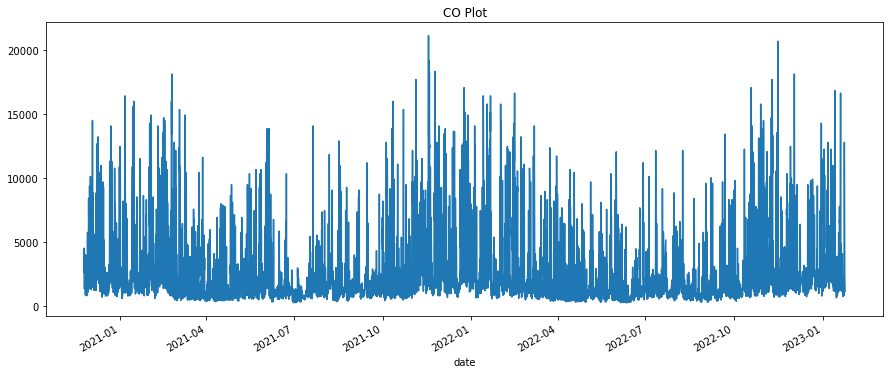

In [6]:
import matplotlib.pyplot as plt

df['co'].plot(figsize=(15,6))
plt.title('CO Plot')

In [7]:
week_day = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday",
           6:"Sunday"}

seasons= {12:'Winter', 1:'Winter', 2:'Spring',
            3:'Spring', 4:'Summer', 5:'Summer',
            6:'Summer', 7:'Monsoon', 8:'Monsoon',
            9:'Autumn', 10:'Autumn', 11:'Winter'}

df['date'] = df.index
df['Year'] = df.date.dt.year
df['Month'] = df.date.dt.month
df['Day'] = df.date.dt.day
df['Hour'] =df.date.dt.hour
df['Day of Year'] = df.date.dt.dayofyear
df['Day of Week'] = df.date.dt.dayofweek
df['Day of Week'] = df['Day of Week'].replace(week_day)
df['Season'] = df['Month'].replace(seasons)

display(df.head(2))

,co,no,no2,o3,so2,pm2_5,pm10,nh3,date,Year,Month,Day,Hour,Day of Year,Day of Week,Season
date,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020,11,25,1,330,Wednesday,Winter
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020,11,25,2,330,Wednesday,Winter


In [8]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Year,Month,Day,Hour,Day of Year
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815,2021.470121,6.609608,15.678259,11.497017,185.581913
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108,0.635113,3.621966,8.812657,6.922565,111.021635
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000,2020.000000,1.000000,1.000000,0.000000,1.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000,2021.000000,3.000000,8.000000,5.000000,88.000000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000,2021.000000,7.000000,16.000000,11.000000,186.000000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000,2022.000000,10.000000,23.000000,17.000000,285.000000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000,2023.000000,12.000000,31.000000,23.000000,366.000000


Text(0.5, 1.0, 'PM 2.5 vs Season')

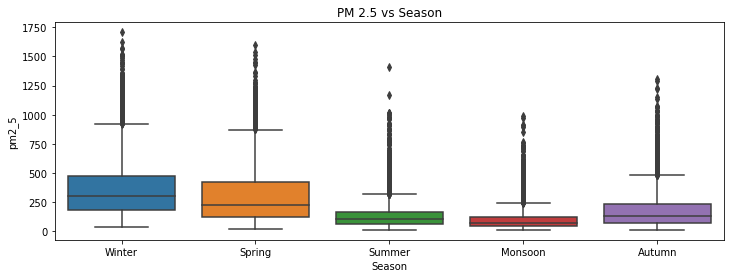

In [9]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(12, 4))

sns.boxplot(data=df, x='Season', y='pm2_5', ax=ax)
ax.set_title("PM 2.5 vs Season")

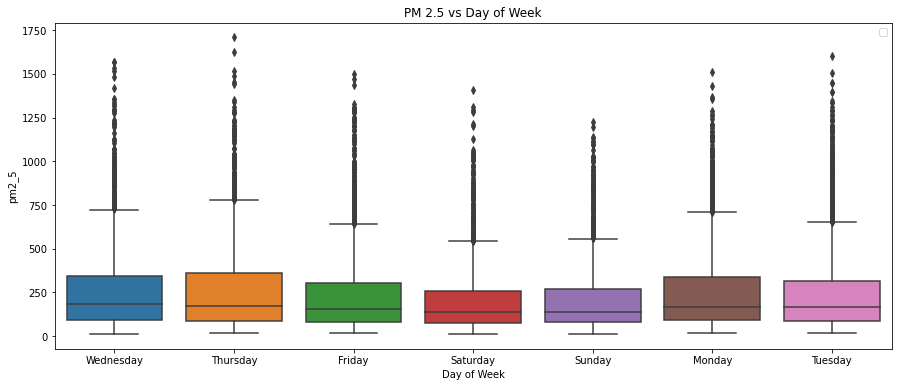

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))

sns.boxplot(data=df, x='Day of Week', y='pm2_5',ax=ax)
ax.set_title("PM 2.5 vs Day of Week")
ax.legend(bbox_to_anchor=(1,1))

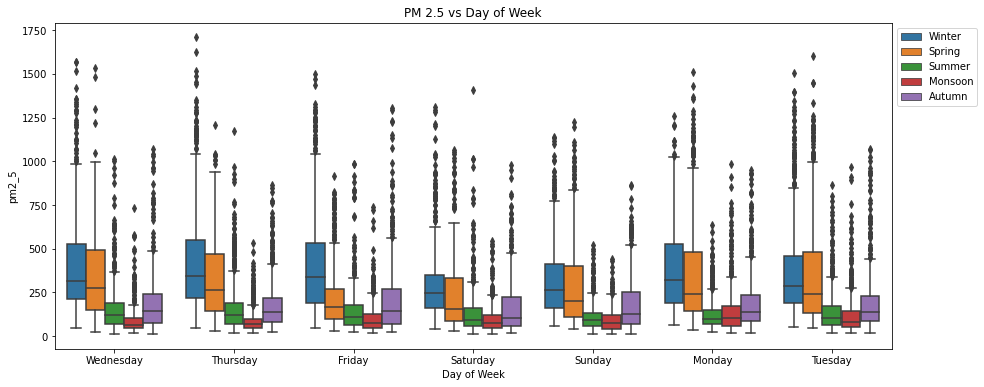

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))

sns.boxplot(data=df, x='Day of Week', y='pm2_5', hue='Season',ax=ax)
ax.set_title("PM 2.5 vs Day of Week")
ax.legend(bbox_to_anchor=(1,1))

Observations:
1. Winter and Spring have the highest PM2.5.
2. Monsoon season have the least PM2.5
3. Weekends have less PM2.5

<AxesSubplot:xlabel='Month', ylabel='pm2_5'>

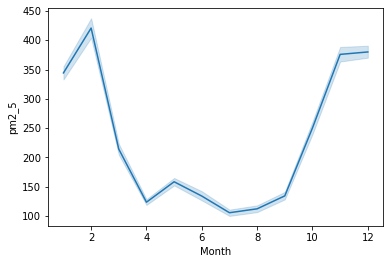

In [12]:
sns.lineplot(data=df, x='Month', y='pm2_5')


In [13]:
def avg_pm25(x):
    dframe = df.groupby(x).mean()['pm2_5']
    
    fig, ax = plt.subplots(1,1, figsize=(12, 5))
    sns.barplot(x = dframe.index, y=dframe.values)
    plt.xlabel(x)
    plt.ylabel('PM 2.5')
    plt.title("PM 2.5 vs "+x)

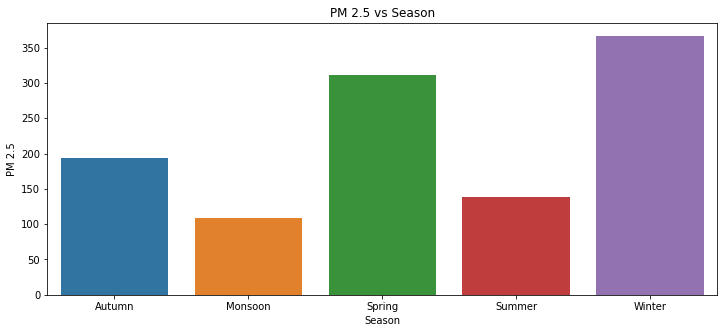

In [14]:
avg_pm25('Season')

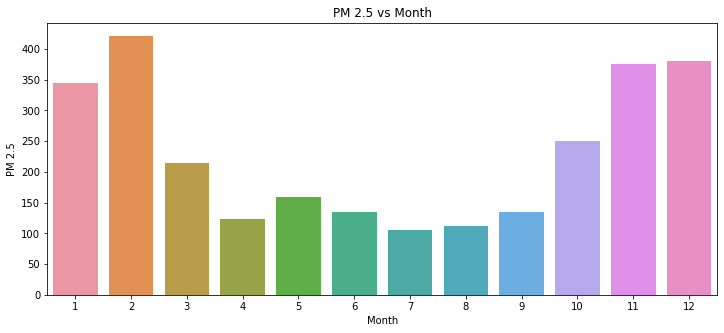

In [15]:
avg_pm25('Month')

In [16]:
list_float = [j for j in df.columns if df[j].dtype == 'float64']
list_float

['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

<AxesSubplot:>

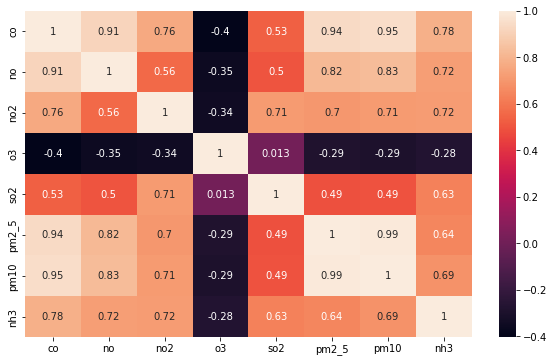

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.heatmap(df[list_float].corr(), annot=True)